In [1]:
## import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras

In [2]:
## read dataset
df  = pd.read_excel('default of credit card clients.xls' ,  index_col=1)
df.head()

## convert xls to csv file 
read_file = pd.read_excel (r'default of credit card clients.xls')
read_file.to_csv (r'default of credit card clients.csv', index = None, header=True)

In [3]:
## read csv and skip first row
df = pd.read_csv('./default of credit card clients.csv' ,skiprows =1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
## drop un necessary columns

df.drop(['ID'] , axis = 1 , inplace = True)
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
df.rename({'default payment next month' : 'label'} ,axis =1 , inplace = True)
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'label'],
      dtype='object')

In [6]:
## know number of duplicates
print("number of duplicates is : {} ".format(df.duplicated().sum()))

number of duplicates is : 35 


In [7]:
## drop duplicated in data 

df.drop_duplicates(inplace = True)
print("number of duplicates is : {} ".format(df.duplicated().sum()))

number of duplicates is : 0 


In [8]:
df.dropna(inplace = True , axis = 0)
df.shape

(29316, 24)

In [9]:
## data in consistent 
df['label'].value_counts()

0    22796
1     6520
Name: label, dtype: int64

In [10]:
def remove_outliers(column,result):
    
    plt.figure(figsize=(20,10))
    plt.subplots(1, 2)
    print("Number of samples before: {}".format(result.shape[0]))

    plt.subplot(121)
    result.boxplot(column)
    plt.title('before removing outliers')
    
    # Save the quartiles
    citation_count_sum_25 = np.percentile(result[column], 25)
    citation_count_sum_50 = np.percentile(result[column], 50)
    citation_count_sum_75 = np.percentile(result[column], 75)
    # Calculate the thresholds
    IQR_citation_count_sum = citation_count_sum_75 - citation_count_sum_25
    Lower_Limit = citation_count_sum_50 - IQR_citation_count_sum * 1.5
    Upper_Limit = citation_count_sum_50 + IQR_citation_count_sum * 1.5

    # Remove the outliers
    result = result.loc[(result[column] > Lower_Limit) & (result[column] < Upper_Limit)]
    
    
    plt.subplot(122)
    result.boxplot(column)
    plt.title('after removing outliers')        
    print("Number of samples before: {}".format(result.shape[0]))
    return result     

Number of samples before: 29316
Number of samples before: 28066


<Figure size 1440x720 with 0 Axes>

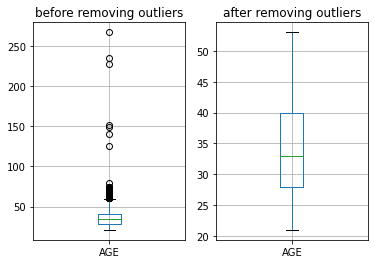

In [12]:
## remove outliers from this column
result = remove_outliers("AGE" , df)

In [13]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
X = pd.get_dummies(X)


In [16]:
## Standard Scaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [24]:
from sklearn.model_selection import train_test_split
##Step1
import tensorflow
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle =True, random_state=42)


print(" train size is : " ,X_train.shape)
print(" train label is : " ,y_train.shape)
print(" test size is : " ,X_test.shape)
print(" test label is : " ,y_test.shape)


 train size is :  (23452, 30)
 train label is :  (23452,)
 test size is :  (5864, 30)
 test label is :  (5864,)


In [25]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=30, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')

In [26]:
model.fit(X_train,y_train,epochs=10)

from sklearn.metrics import roc_auc_score
y_pred1=model.predict(X_test)
print(roc_auc_score(y_test,y_pred1))

Epoch 1/10
733/733 [==============================] - 1s 2ms/step - loss: 0.5009
Epoch 2/10
733/733 [==============================] - 1s 2ms/step - loss: 0.4683
Epoch 3/10
733/733 [==============================] - 1s 2ms/step - loss: 0.4607
Epoch 4/10
733/733 [==============================] - 1s 2ms/step - loss: 0.4559
Epoch 5/10
733/733 [==============================] - 1s 2ms/step - loss: 0.4538
Epoch 6/10
733/733 [==============================] - 1s 2ms/step - loss: 0.4526
Epoch 7/10
733/733 [==============================] - 1s 2ms/step - loss: 0.4517
Epoch 8/10
733/733 [==============================] - 1s 2ms/step - loss: 0.4506
Epoch 9/10
733/733 [==============================] - 1s 2ms/step - loss: 0.4499
Epoch 10/10
733/733 [==============================] - 1s 2ms/step - loss: 0.4494
0.7624099894097813


In [27]:
model.evaluate(X_test , y_test)

184/184 [==============================] - 0s 1ms/step - loss: 0.4433


0.4433252215385437

In [32]:
y_pred = model.predict(X_test)
y_pred

array([[0.12545356],
       [0.19157447],
       [0.10875966],
       ...,
       [0.05008418],
       [0.22188567],
       [0.16689245]], dtype=float32)

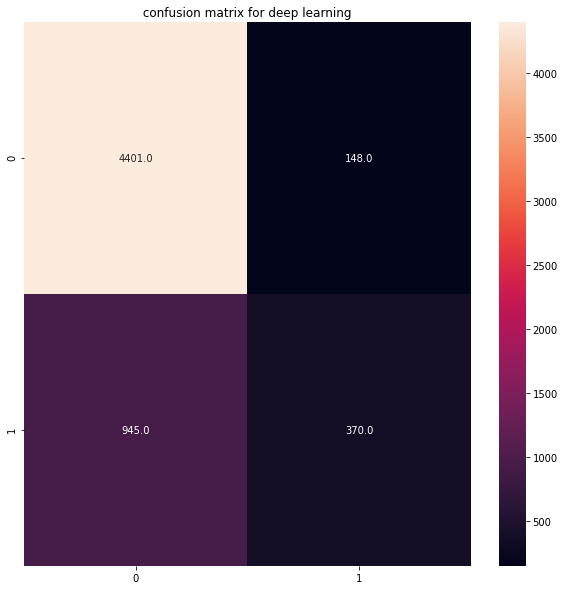

In [35]:
from sklearn.metrics import confusion_matrix

y_pred =(y_pred>0.5)
list(y_pred)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
plt.title(" confusion matrix for deep learning ")
sns.heatmap(cm , annot =True , fmt="0.1f")

In [36]:
## grid search for Hyperparameter tunning

!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc0#egg=keras-tuner-1.0.2rc0



  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc0) to /tmp/pip-install-ea8atome/keras-tuner-1.0.2rc0
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-install-ea8atome/keras-tuner-1.0.2rc0
  Running command git checkout -q 5d16a5a9cd883fe6366d523a5e59b72cfefb7f77
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc0-cp36-none-any.whl size=89059 sha256=0ddda53d2472aacb6afd44ac63878afd0dacacc14a911a79c0f654ece30b08ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-f5jns5fy/wheels/ab/97/20/917008aafbd47b823fb0bc43989739b1195c682036641a49d7
  ERROR: Failed building wheel for keras-tuner
  Running setup.py clean for keras-tuner
  ERROR: Failed cleaning build dir for keras-tuner
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=a7c66a46e2341999c7b0c7571af3a68f55d39a48df6535ad14089c11ad89f82c
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac

In [37]:
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from keras.layers import Dense

In [38]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),input_dim=30,
                               activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [39]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3
    )

In [40]:
tuner.search_space_summary()


In [41]:
tuner.search(X_train, y_train,epochs=15 , validation_data=(X_test, y_test))


Epoch 1/15
733/733 [==============================] - 4s 5ms/step - loss: 0.6931 - accuracy: 0.5117 - val_loss: 0.6931 - val_accuracy: 0.5510
Epoch 2/15
733/733 [==============================] - 3s 5ms/step - loss: 0.6931 - accuracy: 0.5057 - val_loss: 0.6931 - val_accuracy: 0.7758
Epoch 3/15
733/733 [==============================] - 3s 5ms/step - loss: 0.6931 - accuracy: 0.5029 - val_loss: 0.6931 - val_accuracy: 0.2242
Epoch 4/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.2242
Epoch 5/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5029 - val_loss: 0.6931 - val_accuracy: 0.7510
Epoch 6/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5029 - val_loss: 0.6931 - val_accuracy: 0.2242
Epoch 7/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.7079
Epoch 

Epoch 1/15
733/733 [==============================] - 4s 5ms/step - loss: 0.6931 - accuracy: 0.6686 - val_loss: 0.6931 - val_accuracy: 0.7758
Epoch 2/15
733/733 [==============================] - 3s 5ms/step - loss: 0.6931 - accuracy: 0.7781 - val_loss: 0.6931 - val_accuracy: 0.7758
Epoch 3/15
733/733 [==============================] - 3s 5ms/step - loss: 0.6931 - accuracy: 0.7781 - val_loss: 0.6931 - val_accuracy: 0.7758
Epoch 4/15
733/733 [==============================] - 3s 5ms/step - loss: 0.6931 - accuracy: 0.7781 - val_loss: 0.6931 - val_accuracy: 0.7758
Epoch 5/15
733/733 [==============================] - 3s 5ms/step - loss: 0.6931 - accuracy: 0.7781 - val_loss: 0.6931 - val_accuracy: 0.7758
Epoch 6/15
733/733 [==============================] - 3s 5ms/step - loss: 0.6931 - accuracy: 0.7781 - val_loss: 0.6931 - val_accuracy: 0.7758
Epoch 7/15
733/733 [==============================] - 3s 5ms/step - loss: 0.6931 - accuracy: 0.7781 - val_loss: 0.6931 - val_accuracy: 0.7758
Epoch 

Epoch 1/15
733/733 [==============================] - 3s 5ms/step - loss: 0.6931 - accuracy: 0.5073 - val_loss: 0.6931 - val_accuracy: 0.4103
Epoch 2/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5046 - val_loss: 0.6931 - val_accuracy: 0.2260
Epoch 3/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.4993 - val_loss: 0.6931 - val_accuracy: 0.7727
Epoch 4/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.7754
Epoch 5/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5047 - val_loss: 0.6931 - val_accuracy: 0.7691
Epoch 6/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.6676
Epoch 7/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5006 - val_loss: 0.6931 - val_accuracy: 0.2242
Epoch 

Epoch 1/15
733/733 [==============================] - 3s 3ms/step - loss: 0.6935 - accuracy: 0.4883 - val_loss: 0.6931 - val_accuracy: 0.3709
Epoch 2/15
733/733 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.4887 - val_loss: 0.6931 - val_accuracy: 0.2249
Epoch 3/15
733/733 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.4969 - val_loss: 0.6931 - val_accuracy: 0.2239
Epoch 4/15
733/733 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.5021 - val_loss: 0.6931 - val_accuracy: 0.2242
Epoch 5/15
733/733 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.2242
Epoch 6/15
733/733 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.5096 - val_loss: 0.6931 - val_accuracy: 0.7758
Epoch 7/15
733/733 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.5064 - val_loss: 0.6931 - val_accuracy: 0.2242
Epoch 

Epoch 1/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.4913 - val_loss: 0.6931 - val_accuracy: 0.4870
Epoch 2/15
733/733 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.4934 - val_loss: 0.6931 - val_accuracy: 0.4586
Epoch 3/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.4963 - val_loss: 0.6931 - val_accuracy: 0.3557
Epoch 4/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.4966 - val_loss: 0.6931 - val_accuracy: 0.4045
Epoch 5/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.6426
Epoch 6/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.6806
Epoch 7/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.2812
Epoch 

Epoch 1/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.6465
Epoch 2/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6931 - val_accuracy: 0.6791
Epoch 3/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.5041
Epoch 4/15
733/733 [==============================] - 3s 5ms/step - loss: 0.6931 - accuracy: 0.5033 - val_loss: 0.6931 - val_accuracy: 0.4183
Epoch 5/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.2599
Epoch 6/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6931 - val_accuracy: 0.3902
Epoch 7/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5026 - val_loss: 0.6931 - val_accuracy: 0.7089
Epoch 

Epoch 1/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6948 - accuracy: 0.5034 - val_loss: 0.6931 - val_accuracy: 0.6230
Epoch 2/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.7689
Epoch 3/15
733/733 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.4922 - val_loss: 0.6931 - val_accuracy: 0.6731
Epoch 4/15
733/733 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.4985 - val_loss: 0.6931 - val_accuracy: 0.7761
Epoch 5/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.7759
Epoch 6/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.4881 - val_loss: 0.6931 - val_accuracy: 0.5634
Epoch 7/15
733/733 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.2219
Epoch 

Epoch 1/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6933 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.6965
Epoch 2/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.4934 - val_loss: 0.6931 - val_accuracy: 0.2246
Epoch 3/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.7619
Epoch 4/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.4923 - val_loss: 0.6931 - val_accuracy: 0.2242
Epoch 5/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.2242
Epoch 6/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6934 - accuracy: 0.5082 - val_loss: 0.6931 - val_accuracy: 0.4297
Epoch 7/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5300 - val_loss: 0.6931 - val_accuracy: 0.5790
Epoch 

Epoch 1/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5038 - val_loss: 0.6931 - val_accuracy: 0.3053
Epoch 2/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6931 - val_accuracy: 0.7145
Epoch 3/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.4917 - val_loss: 0.6931 - val_accuracy: 0.7768
Epoch 4/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.4943 - val_loss: 0.6931 - val_accuracy: 0.7746
Epoch 5/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.7717
Epoch 6/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5312
Epoch 7/15
733/733 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.4927 - val_loss: 0.6931 - val_accuracy: 0.7754
Epoch 

Epoch 1/15
733/733 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.4977 - val_loss: 0.6931 - val_accuracy: 0.3404
Epoch 2/15
733/733 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.4976 - val_loss: 0.6931 - val_accuracy: 0.7019
Epoch 3/15
733/733 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.5032
Epoch 4/15
733/733 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.6356
Epoch 5/15
733/733 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.4533
Epoch 6/15
733/733 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6931 - val_accuracy: 0.7493
Epoch 7/15
733/733 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.4974 - val_loss: 0.6931 - val_accuracy: 0.2473
Epoch 

INFO:tensorflow:Oracle triggered exit


In [53]:
model = Sequential()
model.add(Dense(320, input_dim=30,name="layer1" ,activation='relu'))
model.add(Dense(320, name="layer2" , activation='relu'))
model.add(Dense(224, name="layer15" , activation='relu'))
model.add(Dense(416, name="layer16" , activation='relu'))
model.add(Dense(1, name="layer19" , activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 320)               9920      
_________________________________________________________________
layer2 (Dense)               (None, 320)               102720    
_________________________________________________________________
layer15 (Dense)              (None, 224)               71904     
_________________________________________________________________
layer16 (Dense)              (None, 416)               93600     
_________________________________________________________________
layer19 (Dense)              (None, 1)                 417       
Total params: 278,561
Trainable params: 278,561
Non-trainable params: 0
_________________________________________________________________


In [54]:
# compile the keras model
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'] )
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=15, batch_size=10, validation_data = (X_test ,y_test) )

Epoch 1/15
2346/2346 [==============================] - 7s 3ms/step - loss: 0.4736 - accuracy: 0.8057 - val_loss: 0.4510 - val_accuracy: 0.8153
Epoch 2/15
2346/2346 [==============================] - 7s 3ms/step - loss: 0.4549 - accuracy: 0.8126 - val_loss: 0.4419 - val_accuracy: 0.8196
Epoch 3/15
2346/2346 [==============================] - 8s 3ms/step - loss: 0.4494 - accuracy: 0.8141 - val_loss: 0.4372 - val_accuracy: 0.8197
Epoch 4/15
2346/2346 [==============================] - 7s 3ms/step - loss: 0.4456 - accuracy: 0.8169 - val_loss: 0.4389 - val_accuracy: 0.8187
Epoch 5/15
2346/2346 [==============================] - 7s 3ms/step - loss: 0.4426 - accuracy: 0.8169 - val_loss: 0.4379 - val_accuracy: 0.8220
Epoch 6/15
2346/2346 [==============================] - 7s 3ms/step - loss: 0.4411 - accuracy: 0.8184 - val_loss: 0.4377 - val_accuracy: 0.8209
Epoch 7/15
2346/2346 [==============================] - 7s 3ms/step - loss: 0.4383 - accuracy: 0.8187 - val_loss: 0.4424 - val_accuracy:

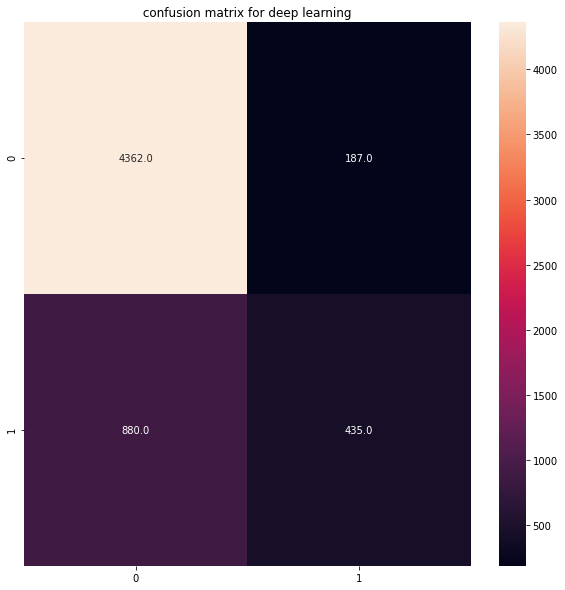

In [55]:
y_pred = model.predict(X_test)
y_pred =(y_pred>0.5)
list(y_pred)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
plt.title(" confusion matrix for deep learning ")
sns.heatmap(cm , annot =True , fmt="0.1f")

## handle implaned dataset 

In [57]:
weights_assigned={0:1,1:400} ## 550 is refer to 550 times from 0
model.fit(X_train,y_train,class_weight=weights_assigned,epochs=15,batch_size=10, validation_data = (X_test ,y_test),shuffle=True)


Epoch 1/15
2346/2346 [==============================] - 9s 4ms/step - loss: 4.1876 - accuracy: 0.2283 - val_loss: 3.4575 - val_accuracy: 0.2304
Epoch 2/15
2346/2346 [==============================] - 9s 4ms/step - loss: 4.1188 - accuracy: 0.2256 - val_loss: 3.2429 - val_accuracy: 0.2277
Epoch 3/15
2346/2346 [==============================] - 9s 4ms/step - loss: 4.2440 - accuracy: 0.2254 - val_loss: 3.5058 - val_accuracy: 0.2261
Epoch 4/15
2346/2346 [==============================] - 9s 4ms/step - loss: 4.0733 - accuracy: 0.2265 - val_loss: 3.5971 - val_accuracy: 0.2260
Epoch 5/15
2346/2346 [==============================] - 9s 4ms/step - loss: 4.1120 - accuracy: 0.2254 - val_loss: 3.3889 - val_accuracy: 0.2270
Epoch 6/15
2346/2346 [==============================] - 9s 4ms/step - loss: 4.0478 - accuracy: 0.2257 - val_loss: 3.2461 - val_accuracy: 0.2271
Epoch 7/15
2346/2346 [==============================] - 9s 4ms/step - loss: 4.0577 - accuracy: 0.2250 - val_loss: 3.0697 - val_accuracy:

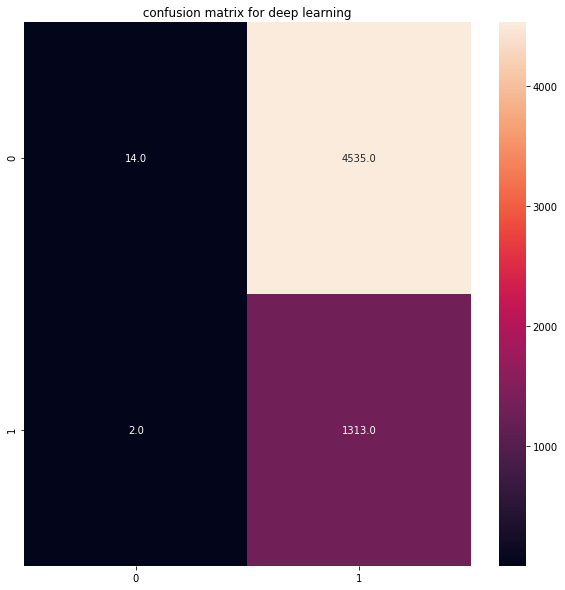

In [58]:
y_pred = model.predict(X_test)
y_pred =(y_pred>0.5)
list(y_pred)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
plt.title(" confusion matrix for deep learning ")
sns.heatmap(cm , annot =True , fmt="0.1f")